ov9732 Camera module    
    Hardware Parameters

    Sensor: 1/4" format with 3.0µm×3.0µm pixel size

    Viewing area: 5.7mm×4.28mm, supports resolutions up to 1280×720.

    Lens: Fixed focus, 1/4" focal length, F2.0 aperture and 100° diagonal field of view.

    Output & Compatibility

    Formats: MJPEG/YUV2 (YUYV) encoding, with frame rates of up to 30 frames per second at a resolution of 720p.

    Interface: USB 2.0 high speed, plug and play compatibility for Windows/Linux/Android systems.

    Features

    Low light capability: Minimum illuminance of 0.5 lux, enabled by highly sensitive pixel design.

    Adjustable parameters: supports brightness, contrast, saturation, white balance and exposure control.

    Shutter Type: Electronic Rolling Shutter or Frame Exposure Modes

    Industrial Design

    Mounting: SMT (Surface Mount Technology) for compact integration.

    Durability: Works in environments from -40°C to +85°C, suitable for long-term use.

    Package includes:

    3 x 100 degree camera module OV9732

    3 x 2 m USB cable. 




     Package Dimensions L x W x H 	‎15.3 x 10.2 x 5.2 centimetres
        Package Weight 	‎0.26 Kilograms
        Brand 	‎YHX-OU
        Colour 	‎black
        Included components 	‎3 x 100 degree camera module / 3 x 2 m USB cable
        ISO Range 	‎100-6400
        Max Focal Length 	‎6.35 Millimetres
        Water Resistance Level 	‎Water Repellent
        Focus type 	‎Fixed Focus
        Maximum shutter speed 	‎1/30
        Aperture Modes 	‎fixed
        Effective still resolution 	‎1280 Pixels
        Guaranteed software updates until 	‎unknown 
        ASIN 	B0DYJW1S1N 

In [1]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.classes = 0

Using cache found in /home/ardrit/.cache/torch/hub/ultralytics_yolov5_master
/home/ardrit/.cache/torch/hub/ultralytics_yolov5_master/utils/general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
YOLOv5 🚀 2025-7-8 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 7787MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


/home/ardrit/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 1 person
Speed: 9.6ms pre-process, 28.2ms inference, 91.6ms NMS per image at shape (1, 3, 384, 640)
Saved 1 image to runs/detect/exp6


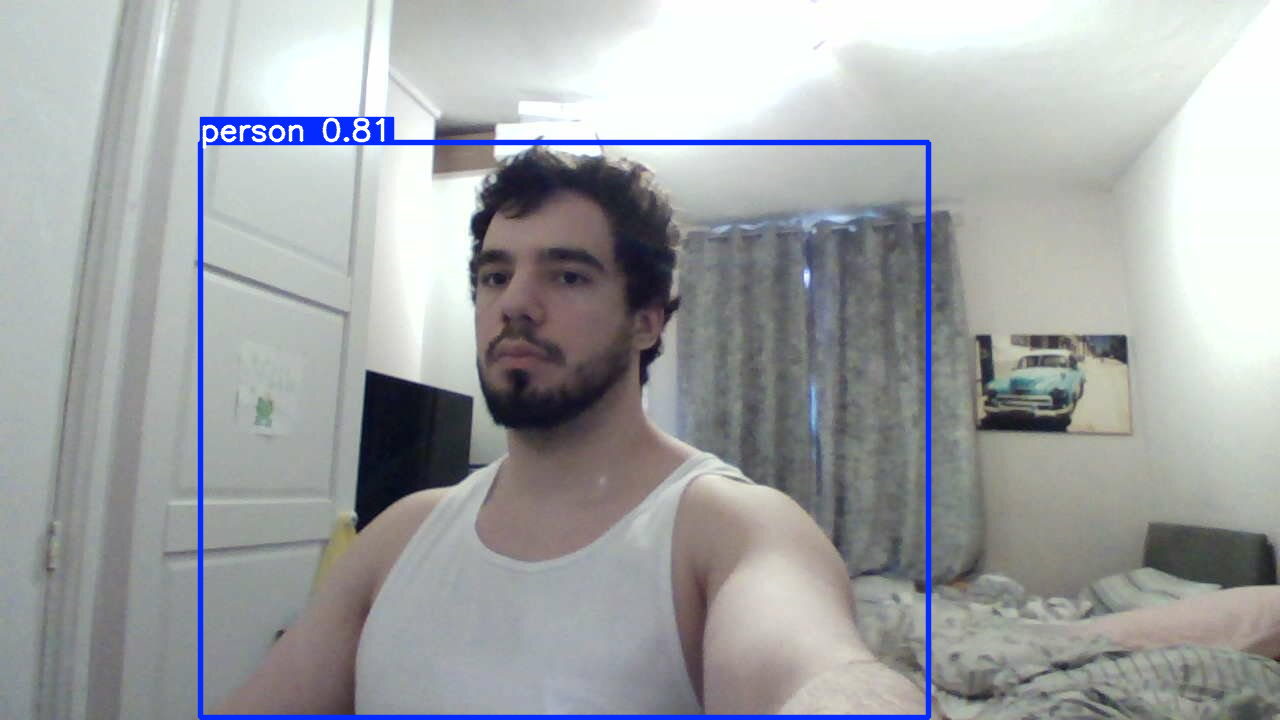

,xmin,ymin,xmax,ymax,confidence,class,name
0,200.637115,142.764557,928.471436,717.927979,0.81488,0,person


In [2]:


results = model("test.jpg")

results.print()
results.save()  # or .show()
results.show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0] 

In [4]:
# Example dummy input (change this shape to match your model's input)
dummy_input = torch.randn(1, 3, 224, 224)

# Correct export call
onnx_program = torch.onnx.export(model, (dummy_input,), dynamo=True)

[torch.onnx] Obtain model graph for `AutoShape([...]` with `torch.export.export(..., strict=False)`...


/home/ardrit/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:879: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


[torch.onnx] Obtain model graph for `AutoShape([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅


In [5]:
onnx_program.save("YOLO.onnx")

In [9]:
import onnxruntime as ort
import cv2
import numpy as np

In [11]:
def load_image(image_path, input_shape=(3, 224, 224)):
    """
    Load an image from path and preprocess it for ONNX model.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (input_shape[2], input_shape[1]))
    image = image.astype(np.float32) / 255.0  # Normalize to [0, 1]
    image = np.transpose(image, (2, 0, 1))     # HWC -> CHW
    image = np.expand_dims(image, axis=0)      # Add batch dimension
    return image

def run_onnx_model(model_path, image_path):
    """
    Run ONNX model inference on the given image.
    """
    # Load image
    input_tensor = load_image(image_path)

    # Create ONNX Runtime session
    session = ort.InferenceSession(model_path)

    # Get model input name
    input_name = session.get_inputs()[0].name

    # Run inference
    outputs = session.run(None, {input_name: input_tensor})

    return outputs

# Example usage
model_path = "YOLO.onnx"
image_path = "test.jpg"

results = run_onnx_model(model_path, image_path)

print("Model output:", results)

Model output: [array([[[      4.364,      3.4287,      9.1059, ...,   0.0024254,   0.0031074,    0.011762],
        [     11.425,      3.8496,      21.722, ...,   0.0019672,   0.0037523,    0.012276],
        [     18.383,      3.5954,      19.867, ...,   0.0022527,   0.0031114,     0.01076],
        ...,
        [     128.86,      181.75,      196.49, ...,    0.006384,  0.00031668,  0.00026041],
        [     172.77,      189.81,      122.97, ...,     0.02378,  0.00035831,  0.00029206],
        [     197.93,      198.37,       155.4, ...,    0.012738,  0.00037509,  0.00030026]]], shape=(1, 3087, 85), dtype=float32)]
